**Implementing PCA in Python with Scikit-Learn**

With the availability of high performance CPUs and GPUs, it is pretty much possible to solve every regression, classification, clustering and other related problems using machine learning and deep learning models. However, there are still various factors that cause performance bottlenecks while developing such models.

Large number of features in the dataset is one of the factors that affect both the training time as well as accuracy of machine learning models. You have different options to deal with huge number of features in a dataset.

Try to train the models on original number of features, which take days or weeks if the number of features is too high.

Reduce the number of variables by merging correlated variables.

Extract the most important features from the dataset that are responsible for maximum variance in the output. Different statistical techniques are used for this purpose e.g. linear discriminant analysis, factor analysis, and principal component analysis (PCA).

**About Principal Component Analysis**

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component.

The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

**Advantages of PCA**

There are two main advantages of dimensionality reduction with PCA.

1> The training time of the algorithms reduces significantly with less number of features.

2> It is not always possible to analyze data in high dimensions. For instance if there are 100 features in a dataset. Total number of scatter plots required to visualize the data would be (100(100-1))/2 = 4950. Practically it is not possible to analyze data this way.

**Normalization of Features**

It is imperative to mention that a feature set must be normalized before applying PCA. For instance if a feature set has data expressed in units of Kilograms, Light years, or Millions, the variance scale is huge in the training set. If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large. Hence, principal components will be biased towards features with high variance, leading to false results.

Finally, the last point to remember before we start coding is that PCA is a statistical technique and can only be applied to **numeric data. Therefore, categorical features are required to be converted into numerical features before PCA can be applied.

Important Note

> IN PCA, if we have 10 features, it works on these 10 features and makes 10 new features which are weighted features of each of the above 10 features. Note, each feature is the weighted average of all 10 old features. Also note that the weighted coefficients for all new features is different.

In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# load the dataset
data = sns.load_dataset("iris")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**EDA**

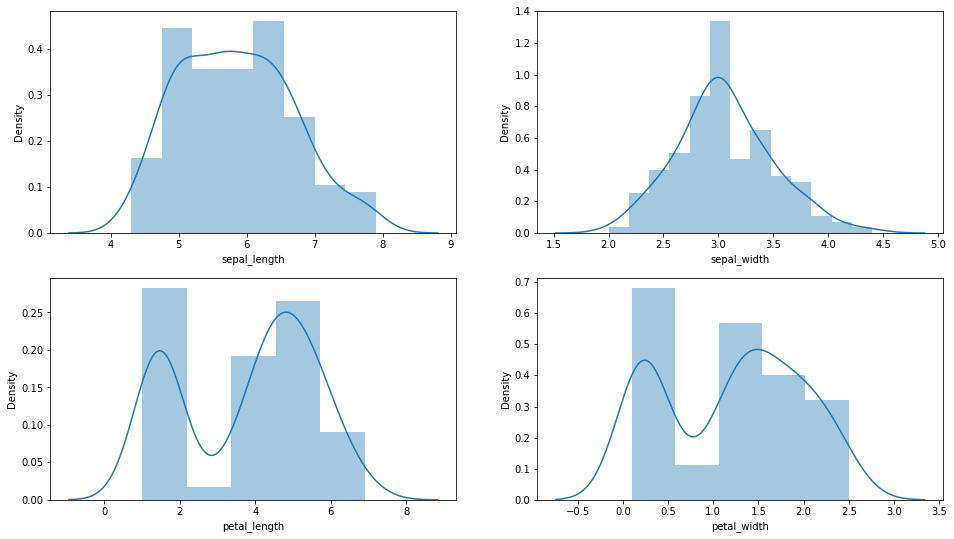

In [8]:
plt.figure(figsize=(16,9))
plotnumber=1

for column in data.iloc[:,:-1]:
  if plotnumber<=5:
    ax = plt.subplot(2,2,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

<AxesSubplot:>

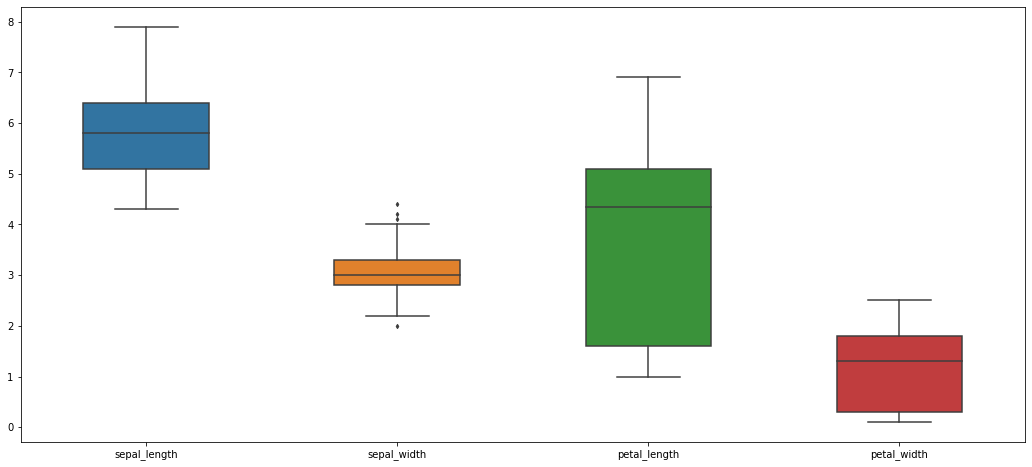

In [9]:
fig,ax = plt.subplots(figsize = (18,8))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)

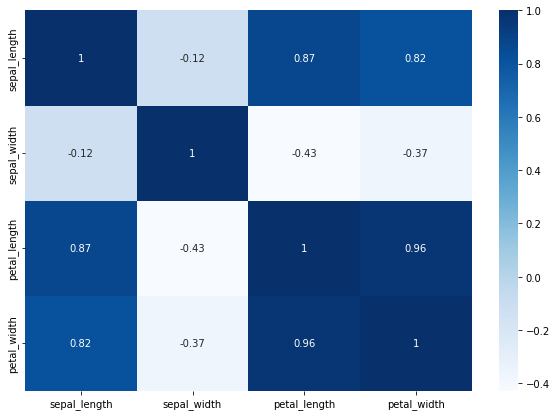

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),cmap = "Blues",annot = True)
plt.show()

In [11]:
data["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

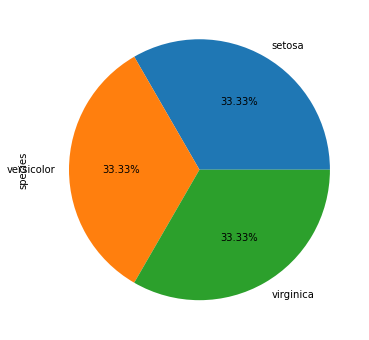

In [12]:
plt.figure(figsize=(6,6))
data["species"].value_counts().plot(kind = "pie",autopct = "%0.2f%%")
plt.show()

**Separate Independent Feature and Dependent Feature**

In [13]:
X = data.drop(columns = ["species"],axis=1)
y = data["species"]

In [14]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

**Feature Scalinga**

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

<AxesSubplot:>

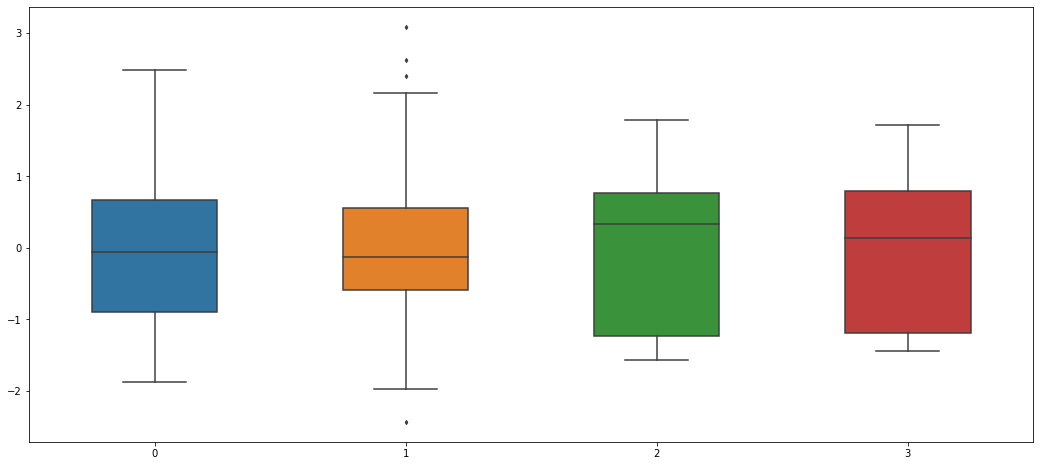

In [18]:
fig,ax = plt.subplots(figsize = (18,8))
sns.boxplot(data=X_scaled,width = 0.5,fliersize = 3,ax=ax)

In [19]:
pd.DataFrame(X_scaled)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


**VIF**

In [20]:
variables = X_scaled

vif = pd.DataFrame()
vif["Vif"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif["Feature"] = X.columns
vif

,Vif,Feature
0,7.072722,sepal_length
1,2.100872,sepal_width
2,31.261498,petal_length
3,16.090175,petal_width


Except Sepal_width all are highly Multi-Correlated

**Splitting the data for Training and Trsting**

In [21]:
#split the data into training and testing

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state = 10)
     

In [22]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (120, 4)
Shape of X Test:  (30, 4)
Shape of y Train:  (120,)
Shape of y Test:  (30,)


### **PCA**

In [23]:
pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

In the code above, we create a PCA object named pca. We did not specify the number of components in the constructor. Hence, all four of the features in the feature set will be returned for both the training and test sets.

The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components.

In [24]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.73357923, 0.22153097, 0.03974125, 0.00514855])

In [25]:
pca = PCA(n_components=1)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

In [26]:
X_train.shape

(120, 1)

In [27]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.73357923])

**Implementing Model and find Model Proformance**

In [29]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]


In [33]:
print(round(accuracy_score(y_test, y_pred)*100,3),"%")

93.333 %
